In [27]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

## Сгенерировать данные (датасет) случайным образом:

```text
date_in     | customer_count | country_code | status
----------------------------------------------------
2024-01-01  | 901            | RU           | 1
2024-01-02  | 901            | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
2024-01-01  | 901            | US           | 1
2024-01-02  | 1024           | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
```

для примера будем создавать датасет для диапазона 2024-01-01-2024-02-28 x 4

In [28]:

from numpy import random
def create_dataset(number_for_date=1):
    result = []
    country_codes = ['RU', 'Ru', 'US', 'us', 'KZ', 'IT', 'it', 'CA', 'Ca']
    status = [1,2,3]
    
    for i in range(number_for_date):
        dates_rng = pd.date_range(start='2024-01-01', end='2024-02-28', freq='D')
        rand_customer_count = random.randint(low=0, high=1000, size=len(dates_rng))
        rand_status = [status[random.randint(low=0, high=len(status))] for i in range(len(dates_rng))]
        rand_country_code = [country_codes[random.randint(low=0, high=len(country_codes))] for i in range(len(dates_rng))]
        result.extend(zip(dates_rng, rand_customer_count, rand_country_code, rand_status))
        
    return result

In [30]:
pd.read_excel?

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'list[str] | None' = None,
    index_col: 'int | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    date_format: 'dict[Hashable, str] | str | N

In [9]:
dataset = create_dataset(4)
df = pd.DataFrame(data=dataset, columns=['date_in', 'coustomer_count', 'country_code', 'status'])

In [10]:
df

,date_in,coustomer_count,country_code,status
0,2024-01-01,167,RU,2
1,2024-01-02,885,IT,1
2,2024-01-03,655,CA,3
3,2024-01-04,811,CA,3
4,2024-01-05,475,Ca,3
...,...,...,...,...
231,2024-02-24,908,KZ,2
232,2024-02-25,339,IT,1
233,2024-02-26,67,it,2
234,2024-02-27,257,it,1


In [12]:
df.to_excel('company_stats.xlsx', index=False)

In [29]:
df = pd.read_excel('company_stats.xlsx', 0, index_col='date_in')
df.head()

,coustomer_count,country_code,status
date_in,,,
2024-01-01,167,RU,2
2024-01-02,885,IT,1
2024-01-03,655,CA,3
2024-01-04,811,CA,3
2024-01-05,475,Ca,3


In [15]:
df.index

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26',
               '2024-02-27', '2024-02-28'],
              dtype='datetime64[ns]', name='date_in', length=236, freq=None)

In [16]:
df.dtypes

coustomer_count     int64
country_code       object
status              int64
dtype: object

In [13]:
pd.read_excel?

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'list[str] | None' = None,
    index_col: 'int | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    date_format: 'dict[Hashable, str] | str | N

In [31]:
df['country_code'] = df.country_code.apply(lambda x: x.upper())

In [19]:
# status = 1
filter_status = df['status']==1
df = df[filter_status]

In [22]:
filter_country_ru = df['country_code']=='RU'
df['country_code'][filter_country_ru] = 'US'

C:\Users\A.Polyakov\AppData\Local\Temp\ipykernel_16300\1892874659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_code'][filter_country_ru] = 'US'


In [36]:
df

,coustomer_count,country_code,status
date_in,,,
2024-01-01,167,RU,2
2024-01-02,885,IT,1
2024-01-03,655,CA,3
2024-01-04,811,CA,3
2024-01-05,475,CA,3
...,...,...,...
2024-02-24,908,KZ,2
2024-02-25,339,IT,1
2024-02-26,67,IT,2


In [33]:
# unique country codes
df['country_code'].unique()

array(['RU', 'IT', 'CA', 'US', 'KZ'], dtype=object)

<Axes: xlabel='date_in'>

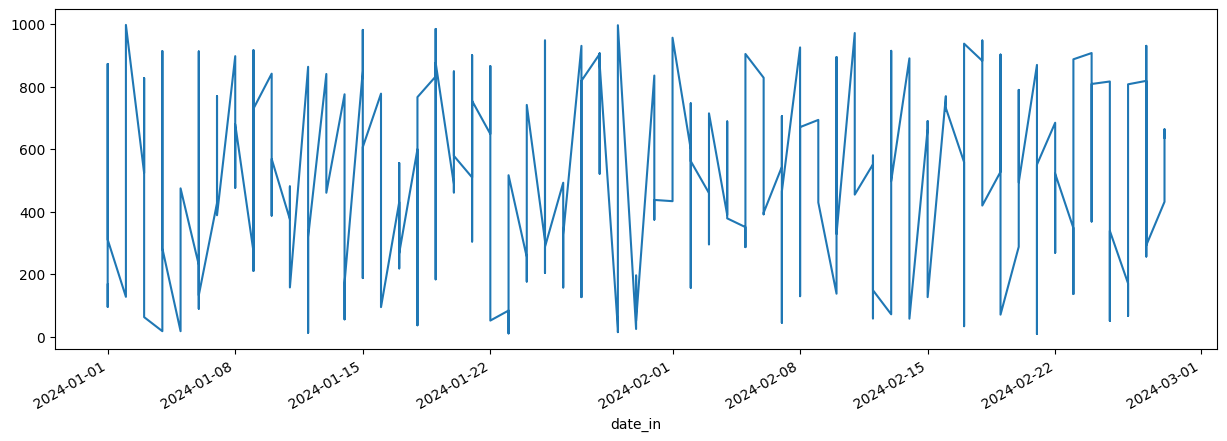

In [38]:
df['coustomer_count'].plot(figsize=(15,5))

## Построить график кол-ва клиентов

## Сгруппировать данные по странам, датам. Удалить колонку статус. Отобразить графики кол-ва пользователей по странам. Отобразить только за 2024-й год.

## Найти аномалии
По месяцам:

- Lower = `x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25))`
- Upper: `x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25))`

## Найти максимум по годам

## Добавить колонку Годовая цель. Отобразить на одном графике.

## Показать как менялось в процентах по годам максимальное значение (yr_pct_change)

In [40]:
daily_data = df.reset_index().groupby(['country_code','date_in']).sum()
daily_data

coustomer_count  status
country_code date_in                            
CA           2024-01-01               96       1
             2024-01-03              655       3
             2024-01-04              811       3
             2024-01-05              475       3
             2024-01-06             1046       4
...                                  ...     ...
US           2024-02-19              599       3
             2024-02-22              269       1
             2024-02-25               51       1
             2024-02-26              808       3
             2024-02-28             1069       4

[165 rows x 2 columns]

In [61]:
del daily_data['status']

In [44]:
daily_data.index

MultiIndex([('CA', '2024-01-01'),
            ('CA', '2024-01-03'),
            ('CA', '2024-01-04'),
            ('CA', '2024-01-05'),
            ('CA', '2024-01-06'),
            ('CA', '2024-01-09'),
            ('CA', '2024-01-10'),
            ('CA', '2024-01-11'),
            ('CA', '2024-01-12'),
            ('CA', '2024-01-14'),
            ...
            ('US', '2024-02-06'),
            ('US', '2024-02-08'),
            ('US', '2024-02-09'),
            ('US', '2024-02-12'),
            ('US', '2024-02-14'),
            ('US', '2024-02-19'),
            ('US', '2024-02-22'),
            ('US', '2024-02-25'),
            ('US', '2024-02-26'),
            ('US', '2024-02-28')],
           names=['country_code', 'date_in'], length=165)

In [46]:
daily_data.index.dtypes

country_code            object
date_in         datetime64[ns]
dtype: object

In [50]:
daily_data.index.levels[0]

Index(['CA', 'IT', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

<Axes: xlabel='date_in'>

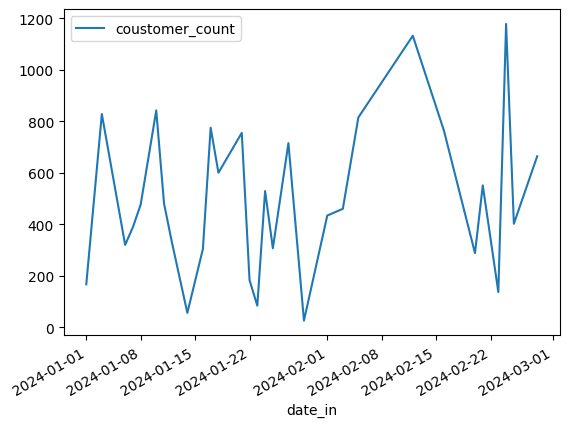

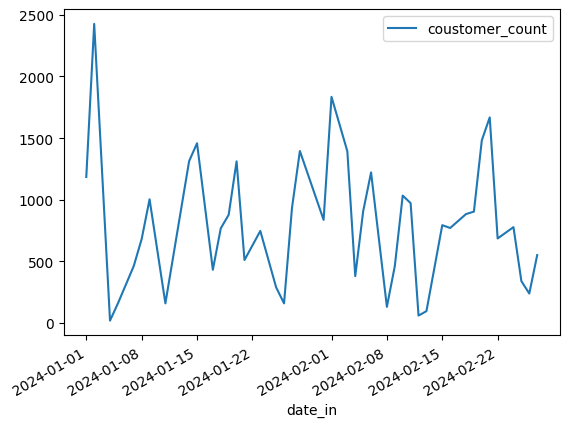

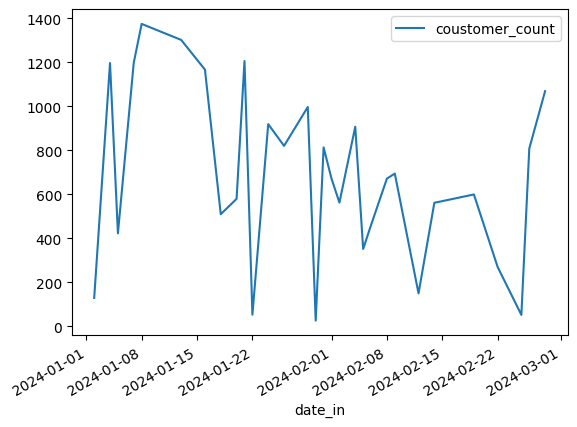

In [63]:
daily_data.loc['RU'].plot()
daily_data.loc['IT'].plot()
daily_data.loc['US'].plot()

<Axes: xlabel='date_in'>

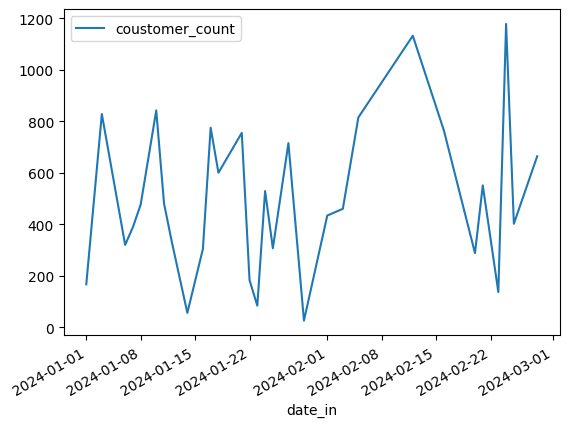

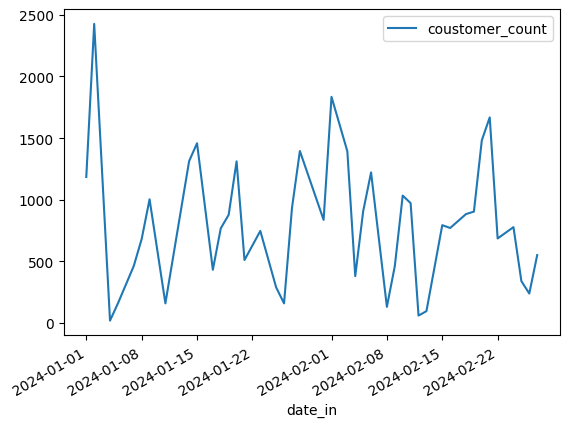

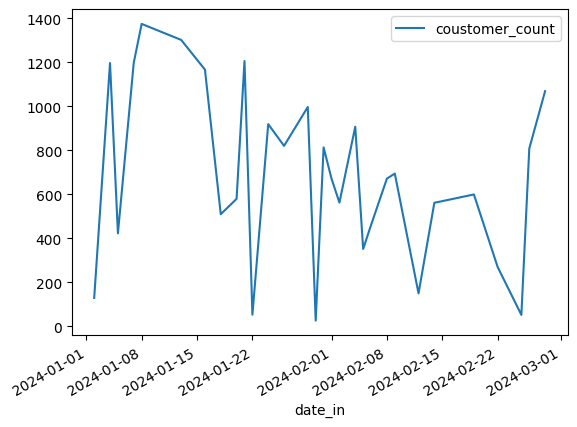

In [67]:
daily_data.loc['RU']['2024':].plot() 
daily_data.loc['IT']['2024':].plot() 
daily_data.loc['US']['2024':].plot() 

In [73]:
group_year_month = daily_data.groupby([daily_data.index.get_level_values(0), daily_data.index.get_level_values(1).year, daily_data.index.get_level_values(1).month])
daily_data['lower'] = group_year_month['coustomer_count'].transform(lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['upper'] = group_year_month['coustomer_count'].transform(lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['outlier'] = (daily_data['coustomer_count'] < daily_data['lower']) | (daily_data['coustomer_count'] > daily_data['upper'])

In [75]:
daily_data.head(20)

coustomer_count  lower   upper  outlier
country_code date_in                                            
CA           2024-01-01               96 -650.5  1919.5    False
             2024-01-03              655 -650.5  1919.5    False
             2024-01-04              811 -650.5  1919.5    False
             2024-01-05              475 -650.5  1919.5    False
             2024-01-06             1046 -650.5  1919.5    False
             2024-01-09             1128 -650.5  1919.5    False
             2024-01-10              388 -650.5  1919.5    False
             2024-01-11              840 -650.5  1919.5    False
             2024-01-12              864 -650.5  1919.5    False
             2024-01-14              173 -650.5  1919.5    False
             2024-01-15             1170 -650.5  1919.5    False
             2024-01-17              268 -650.5  1919.5    False
             2024-01-18               37 -650.5  1919.5    False
             2024-01-19             2002 -650.5  1919.5     True
             2024-01-20              488 -650.5  1919.5    False
             2024-01-22              866 -650.5  1919.5    False
             2024-01-27              819 -650.5  1919.5    False
             2024-01-28             1812 -650.5  1919.5    False
             2024-01-30              145 -650.5  1919.5    False
             2024-01-31              475 -650.5  1919.5    False

In [76]:
daily_data = daily_data[daily_data['outlier'] == False]
daily_data.head(20)

coustomer_count  lower   upper  outlier
country_code date_in                                            
CA           2024-01-01               96 -650.5  1919.5    False
             2024-01-03              655 -650.5  1919.5    False
             2024-01-04              811 -650.5  1919.5    False
             2024-01-05              475 -650.5  1919.5    False
             2024-01-06             1046 -650.5  1919.5    False
             2024-01-09             1128 -650.5  1919.5    False
             2024-01-10              388 -650.5  1919.5    False
             2024-01-11              840 -650.5  1919.5    False
             2024-01-12              864 -650.5  1919.5    False
             2024-01-14              173 -650.5  1919.5    False
             2024-01-15             1170 -650.5  1919.5    False
             2024-01-17              268 -650.5  1919.5    False
             2024-01-18               37 -650.5  1919.5    False
             2024-01-20              488 -650.5  1919.5    False
             2024-01-22              866 -650.5  1919.5    False
             2024-01-27              819 -650.5  1919.5    False
             2024-01-28             1812 -650.5  1919.5    False
             2024-01-30              145 -650.5  1919.5    False
             2024-01-31              475 -650.5  1919.5    False
             2024-02-02              757 -564.5  2268.5    False

In [69]:
daily_data.index.get_level_values(1).year

Index([2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='date_in', length=165)

In [71]:
daily_data.groupby?

Signature:
daily_data.groupby(
    by=None,
    axis: 'Axis' = 0,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool' = False,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of length
    equal to the selected axis is passed 

In [79]:
all_df = pd.DataFrame(daily_data['coustomer_count'].groupby(daily_data.index.get_level_values(1)).sum())
all_df.columns = ['customer_count']

In [80]:
all_df

,customer_count
date_in,
2024-01-01,1447
2024-01-02,2555
2024-01-03,2070
2024-01-04,2026
2024-01-05,1055
2024-01-06,1366
2024-01-07,2048
2024-01-08,2532
2024-01-09,2131


In [81]:
year_month = all_df.groupby([lambda x: x.year, lambda x: x.month])
all_df['max'] = year_month['customer_count'].transform(lambda x: x.max())
all_df.head()

,customer_count,max
date_in,,
2024-01-01,1447,3207
2024-01-02,2555,3207
2024-01-03,2070,3207
2024-01-04,2026,3207
2024-01-05,1055,3207


In [83]:
data = [1000, 2000, 3000]
idx = pd.date_range(start='2022-01-01', end= '2025-01-01', freq='A')
BAG = pd.DataFrame(data, index=idx, columns=['BAG'])
BAG

,BAG
2022-12-31,1000
2023-12-31,2000
2024-12-31,3000


all_df + BAG

y - customer_count
x = dates

data = max, bag

In [85]:
combined = pd.concat([all_df, BAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,customer_count,max,BAG
2024-02-25,1609.0,2990.0,NaN
2024-02-26,1219.0,2990.0,NaN
2024-02-27,2300.0,2990.0,NaN
2024-02-28,2215.0,2990.0,NaN
2024-12-31,NaN,NaN,3000.0


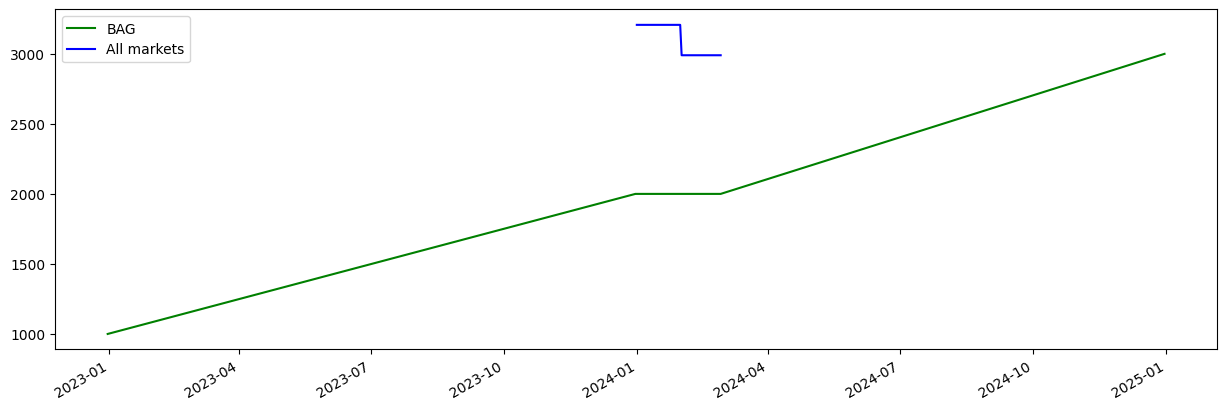

In [88]:
fig,axes = plt.subplots(figsize=(15,5))

combined['BAG'].fillna(method='pad').plot(color='green', label='BAG')
combined['max'].plot(color='blue', label='All markets')

plt.legend(loc='best')

In [89]:
year = combined.groupby(lambda x: x.year).max()
year

,customer_count,max,BAG
2022,NaN,NaN,1000.0
2023,NaN,NaN,2000.0
2024,3207.0,3207.0,3000.0


In [98]:
year.index

Index([2022, 2023, 2024], dtype='int32')

In [108]:
year['max'] = [2022, 2023, 3207.0]

In [111]:
year['yr_pct_change'] = year['max'].pct_change(periods=1)
year

,customer_count,max,BAG,yr_pct_change
2022,NaN,2022.0,1000.0,NaN
2023,NaN,2023.0,2000.0,0.000495
2024,3207.0,3207.0,3000.0,0.585269


In [ ]:
# сравнить на одном графике данные по всем маркетам (всем странам) с данными каждой конкретной страны

# хотелось бы предсказать кол-во пользователей в следующем году (!)